In [41]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import sys
import os
import glob
import seaborn as sns
import statsmodels.api as sm


In [2]:
# glob does pattern matching on file structure
print(os.getcwd()+'/Storm Event Data/')

/Users/lexbukowski/Documents/CSPB_4502/Term_Project/Storm-Event-Data/Storm Event Data/


In [3]:
# glob does pattern matching on file structure
filelist = glob.glob(os.getcwd()+'/Storm Event Data/*details*.csv*')
df = pd.concat([pd.read_csv(f) for f in filelist]) 

/var/folders/z1/rbnw3yln6dqc6zd42r1xlqxc0000gn/T/ipykernel_28165/1229720641.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in filelist])
/var/folders/z1/rbnw3yln6dqc6zd42r1xlqxc0000gn/T/ipykernel_28165/1229720641.py:3: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in filelist])
/var/folders/z1/rbnw3yln6dqc6zd42r1xlqxc0000gn/T/ipykernel_28165/1229720641.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in filelist])
/var/folders/z1/rbnw3yln6dqc6zd42r1xlqxc0000gn/T/ipykernel_28165/1229720641.py:3: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in filelist])
/var/folders/z1/rbnw3yln6dqc6zd42r1xlqxc0000

In [4]:
df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195203,18,1830,195203,18,1830,NaN,10063631,MISSOURI,29.0,...,0.0,NaN,NaN,37.37,-89.78,37.45,-89.73,NaN,NaN,PUB
1,195206,29,1100,195206,29,1100,NaN,9991454,FLORIDA,12.0,...,0.0,NaN,NaN,27.75,-82.65,NaN,NaN,NaN,NaN,PUB
2,195201,17,1934,195201,17,1934,NaN,10104937,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,41.60,-80.30,NaN,NaN,NaN,NaN,PUB
3,195204,5,1215,195204,5,1215,NaN,10104938,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,39.80,-76.98,39.95,-76.72,NaN,NaN,PUB
4,195204,5,1300,195204,5,1300,NaN,10104939,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.23,-76.80,NaN,NaN,NaN,NaN,PUB


In [5]:
df.info

<bound method DataFrame.info of       BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
0              195203         18        1830         195203       18   
1              195206         29        1100         195206       29   
2              195201         17        1934         195201       17   
3              195204          5        1215         195204        5   
4              195204          5        1300         195204        5   
...               ...        ...         ...            ...      ...   
1940           196003         29        2135         196003       29   
1941           196003         29        2140         196003       29   
1942           196004         16        1205         196004       16   
1943           196004         16        1945         196004       16   
1944           196005         16        1515         196005       16   

      END_TIME  EPISODE_ID  EVENT_ID         STATE  STATE_FIPS  ...  \
0         1830         NaN  1006



There are missing values in a significant number of values missing from the event description fields. A lot of this is due to different event types only having data in select fields.

In [6]:
print(df.isna().value_counts())

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  EPISODE_ID  EVENT_ID  STATE  STATE_FIPS  YEAR   MONTH_NAME  EVENT_TYPE  CZ_TYPE  CZ_FIPS  CZ_NAME  WFO    BEGIN_DATE_TIME  CZ_TIMEZONE  END_DATE_TIME  INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  DAMAGE_CROPS  SOURCE  MAGNITUDE  MAGNITUDE_TYPE  FLOOD_CAUSE  CATEGORY  TOR_F_SCALE  TOR_LENGTH  TOR_WIDTH  TOR_OTHER_WFO  TOR_OTHER_CZ_STATE  TOR_OTHER_CZ_FIPS  TOR_OTHER_CZ_NAME  BEGIN_RANGE  BEGIN_AZIMUTH  BEGIN_LOCATION  END_RANGE  END_AZIMUTH  END_LOCATION  BEGIN_LAT  BEGIN_LON  END_LAT  END_LON  EPISODE_NARRATIVE  EVENT_NARRATIVE  DATA_SOURCE
False            False      False       False          False    False     False       False     False  False       False  False       False       False    False    False    False  False            False        False          False            False              False          False            False            False         False   False  

In [7]:
for col in df:
    print(col)

BEGIN_YEARMONTH
BEGIN_DAY
BEGIN_TIME
END_YEARMONTH
END_DAY
END_TIME
EPISODE_ID
EVENT_ID
STATE
STATE_FIPS
YEAR
MONTH_NAME
EVENT_TYPE
CZ_TYPE
CZ_FIPS
CZ_NAME
WFO
BEGIN_DATE_TIME
CZ_TIMEZONE
END_DATE_TIME
INJURIES_DIRECT
INJURIES_INDIRECT
DEATHS_DIRECT
DEATHS_INDIRECT
DAMAGE_PROPERTY
DAMAGE_CROPS
SOURCE
MAGNITUDE
MAGNITUDE_TYPE
FLOOD_CAUSE
CATEGORY
TOR_F_SCALE
TOR_LENGTH
TOR_WIDTH
TOR_OTHER_WFO
TOR_OTHER_CZ_STATE
TOR_OTHER_CZ_FIPS
TOR_OTHER_CZ_NAME
BEGIN_RANGE
BEGIN_AZIMUTH
BEGIN_LOCATION
END_RANGE
END_AZIMUTH
END_LOCATION
BEGIN_LAT
BEGIN_LON
END_LAT
END_LON
EPISODE_NARRATIVE
EVENT_NARRATIVE
DATA_SOURCE


In [8]:
for col in df:
    print(col)
    print(df[col].unique())

BEGIN_YEARMONTH
[195203 195206 195201 195204 195207 195208 195205 195212 195202 195211
 195209 197506 197507 197511 197505 197503 197504 197512 197509 197510
 197508 197502 197501 199311 199305 199304 199308 199312 199309 199303
 199302 199310 199301 200201 200203 200212 200210 200209 200204 200207
 200206 200211 200208 200205 200202 198705 198710 198709 198707 198701
 198708 198703 198706 198712 198704 198702 198711 196707 196706 196705
 196708 196709 196711 196712 196710 196704 196701 196703 196702 195910
 195904 195905 195909 195908 195907 195906 195903 195911 195912 195902
 195901 199811 199812 199810 199809 199806 199808 199802 199805 199807
 199801 199804 199803 202302 202303 202301 202304 202305 202306 200912
 200901 200903 200910 200911 200907 200904 200906 200909 200902 200905
 200908 196308 196312 196301 196303 196304 196305 196306 196307 196309
 196311 196310 196302 198307 198304 198309 198312 198308 198305 198311
 198303 198306 198310 198302 198301 202006 202005 202002 2020

In [9]:
df['BEGIN_YEARMONTH'] = df['BEGIN_YEARMONTH'].astype(str)
df['BEGIN_YEARMONTHDAY'] = df['BEGIN_YEARMONTH'] + df['BEGIN_DAY'].astype(str)
df['BEGIN_YEARMONTHDAY'] = df['BEGIN_YEARMONTHDAY'].astype(str)
df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_YEARMONTHDAY'],format='%Y%m%d')
df['BEGIN_YEAR'] = df['BEGIN_DATE'].dt.year

df['END_YEARMONTH'] = df['END_YEARMONTH'].astype(str)
df['END_YEARMONTHDAY'] = df['END_YEARMONTH'] + df['END_DAY'].astype(str)
df['END_YEARMONTHDAY'] = df['END_YEARMONTHDAY'].astype(str)
df['END_DATE'] = pd.to_datetime(df['END_YEARMONTHDAY'],format='%Y%m%d')
df['END_YEAR'] = df['END_DATE'].dt.year


In [10]:
print(df['EVENT_TYPE'].value_counts())

EVENT_TYPE
Thunderstorm Wind                 510097
Hail                              396551
Flash Flood                        97843
High Wind                          86451
Winter Storm                       84801
                                   ...  
THUNDERSTORM WIND/ TREE                1
THUNDERSTORM WINDS/FLASH FLOOD         1
HAIL FLOODING                          1
TORNADOES, TSTM WIND, HAIL             1
HAIL/ICY ROADS                         1
Name: count, Length: 70, dtype: int64


In [11]:
event_list = df['EVENT_TYPE'].unique()
event_dict = {'Tornado':'Tornado', 'Hail':'Hail', 'Thunderstorm Wind':'Thunderstorm', 'TORNADOES, TSTM WIND, HAIL':'Tornado',
 'THUNDERSTORM WINDS/FLOODING':'Thunderstorm', 'HAIL/ICY ROADS':'Winter Storm', 'HAIL FLOODING':'Hail',
 'THUNDERSTORM WINDS/FLASH FLOOD':'Thunderstorm', 'THUNDERSTORM WINDS LIGHTNING':'Thunderstorm',
 'THUNDERSTORM WIND/ TREES':'Thunderstorm', 'THUNDERSTORM WIND/ TREE':'Thunderstorm',
 'THUNDERSTORM WINDS FUNNEL CLOU':'Thunderstorm', 'TORNADO/WATERSPOUT':'Tornado',
 'THUNDERSTORM WINDS/HEAVY RAIN':'Thunderstorm', 'THUNDERSTORM WINDS HEAVY RAIN':'Thunderstorm',
 'THUNDERSTORM WINDS/ FLOOD':'Thunderstorm', 'High Wind':'High Wind', 'Flash Flood':'Flood', 'Winter Storm':'Winter Storm',
 'Blizzard':'Winter Storm', 'Cold/Wind Chill':'Cold', 'Heavy Snow':'Winter Storm', 'Flood':'Flood', 'Ice Storm':'Winter Storm', 'Dense Fog':'Other',
 'Winter Weather':'Winter Storm', 'Avalanche':'Avalanche', 'Frost/Freeze':'Winter Storm', 'Lightning':'Lightning', 'Heat':'Heat',
 'Heavy Rain':'Flood', 'Funnel Cloud':'Tornado', 'Coastal Flood':'Flood', 'Strong Wind':'High Wind', 'Wildfire':'Wildfire',
 'Waterspout':'Tornado', 'High Surf':'Storm Surge/Tide', 'Dust Storm':'High Wind', 'Drought': 'Drought', 'Rip Current':'Storm Surge/Tide',
 'Dust Devil':'Tornado', 'Tropical Storm': 'Tropical Storm/Depression', 'Debris Flow': 'Other', 'Hurricane (Typhoon)':'Hurricane',
 'Freezing Fog':'Winter Storm', 'Storm Surge/Tide': 'Storm Surge/Tide', 'Marine High Wind':'Marine Events', 'Sleet':'Winter Storm',
 'Lake-Effect Snow':'Winter Storm', 'Astronomical Low Tide':'Storm Surge/Tide', 'Volcanic Ash':'Other', 'Seiche':'Storm Surge/Tide',
 'Extreme Cold/Wind Chill':'Cold', 'Excessive Heat':'Heat', 'Marine Thunderstorm Wind':'Marine Events',
 'Northern Lights':'Other', 'Marine Hail':'Marine Events', 'Dense Smoke':'Other', 'Tsunami':'Other',
 'Marine Strong Wind':'Marine Events', 'Lakeshore Flood':'Flood', 'Tropical Depression':'Tropical Storm/Depression',
 'Volcanic Ashfall':'Other', 'Sneakerwave':'Storm Surge/Tide', 'Marine Tropical Storm':'Marine Events',
 'Marine Dense Fog':'Marine Events', 'Marine Hurricane/Typhoon':'Marine Events', 'Marine Lightning':'Marine Events',
 'Marine Tropical Depression':'Marine Events', 'Hurricane':'Hurricane'}

In [12]:
df['EVENT_TYPE'].head()

0    Tornado
1    Tornado
2    Tornado
3    Tornado
4    Tornado
Name: EVENT_TYPE, dtype: object

In [13]:
def apply_event_type(row,col):
    return event_dict[row[col]]
    
df['EVENT_TYPE_CONSOLIDATED'] = df.apply(lambda x: apply_event_type(x,'EVENT_TYPE'),axis=1)
df['EVENT_TYPE_CONSOLIDATED'].head()

0    Tornado
1    Tornado
2    Tornado
3    Tornado
4    Tornado
Name: EVENT_TYPE_CONSOLIDATED, dtype: object

In [14]:
print(df['EVENT_TYPE_CONSOLIDATED'].value_counts())

EVENT_TYPE_CONSOLIDATED
Thunderstorm                 510111
Hail                         396552
Winter Storm                 276411
Flood                        195945
High Wind                    113520
Tornado                       91488
Drought                       70728
Marine Events                 39557
Heat                          38582
Cold                          31869
Other                         18159
Lightning                     17528
Storm Surge/Tide              14381
Wildfire                       8422
Tropical Storm/Depression      6866
Hurricane                      2057
Avalanche                       793
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


70


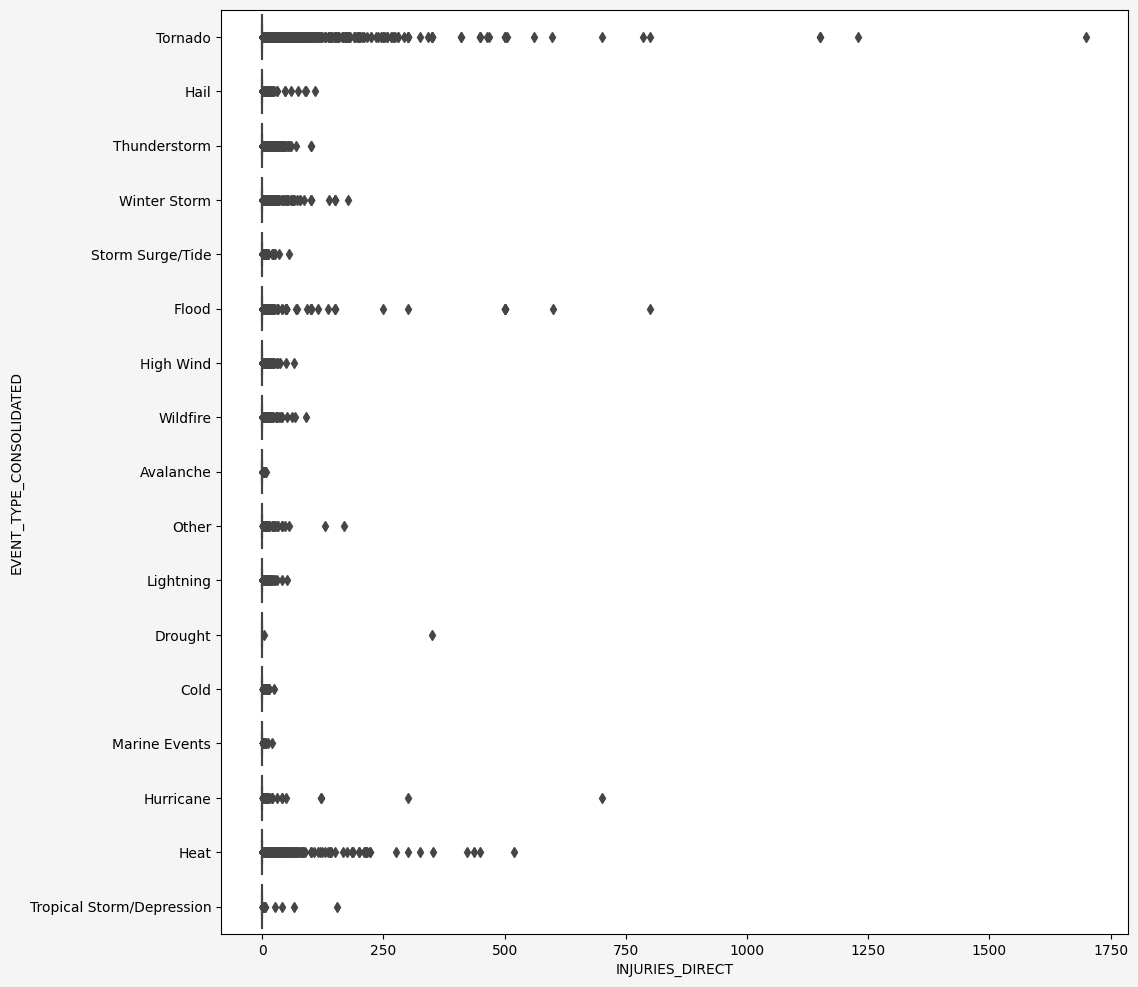

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.boxplot(data=df, x='INJURIES_DIRECT',y='EVENT_TYPE_CONSOLIDATED')
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(11.7, 12)
print(len(df['EVENT_TYPE'].unique()))

Percent of events causing injuries: 0.721343350596764
Total # of Injuries: 13222
1150      450
2197      450
2783      450
9104      450
2796      463
18350     468
46406     500
1831      500
10921     500
10028     500
1554      500
10460     500
10434     500
17694     500
2563      500
342       504
57237     519
2242      560
342       597
10457     600
73092     700
40295     700
174       785
4982      800
71565     800
37524    1150
3040     1150
128      1228
4188     1700
69203    2400
Name: INJURIES_TOTAL, dtype: int64


/var/folders/z1/rbnw3yln6dqc6zd42r1xlqxc0000gn/T/ipykernel_28165/3213889143.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percent of events causing injuries:",vals[1]/(vals[0]+vals[1])*100)
/var/folders/z1/rbnw3yln6dqc6zd42r1xlqxc0000gn/T/ipykernel_28165/3213889143.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total # of Injuries:", vals[1])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.a

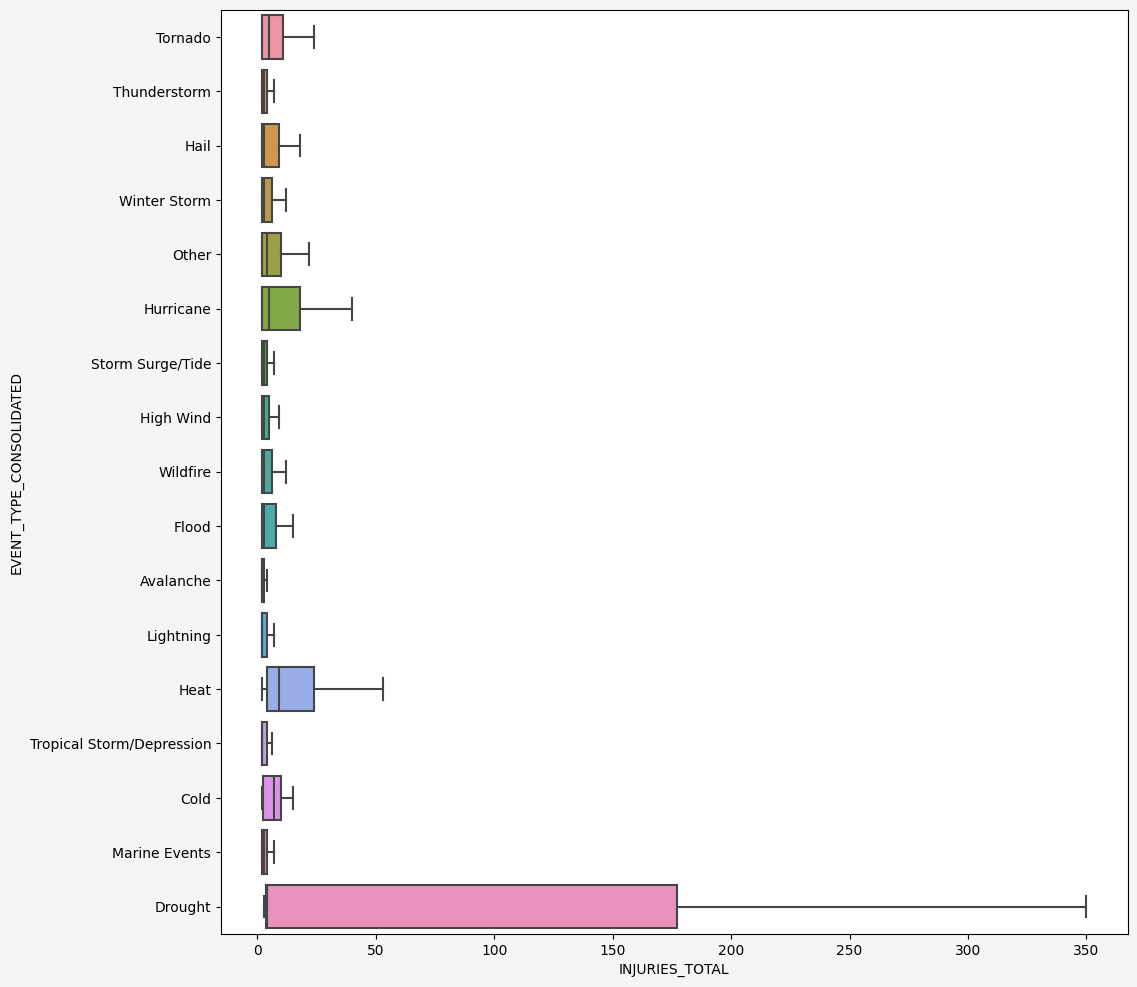

In [16]:
df['INJURIES_TOTAL'] = df['INJURIES_DIRECT'] + df['INJURIES_INDIRECT']

bins = [-1,1,np.inf]
names = ['NO','YES']
df['CAUSED_INJURIES'] = pd.cut(df['INJURIES_TOTAL'],bins,labels=names)
vals = df['CAUSED_INJURIES'].value_counts()
print("Percent of events causing injuries:",vals[1]/(vals[0]+vals[1])*100)
print("Total # of Injuries:", vals[1])

df_injuries = df[df['CAUSED_INJURIES'] == 'YES']
print(df_injuries['INJURIES_TOTAL'].sort_values().tail(30))

# Turned off fliers to make plot readable - note that the more common events have very big outliers (ie 2500 deaths), making up a 
# portion of the total injuries
g = sns.boxplot(data=df_injuries, x='INJURIES_TOTAL',y='EVENT_TYPE_CONSOLIDATED',showfliers=False)
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(11.7, 12)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


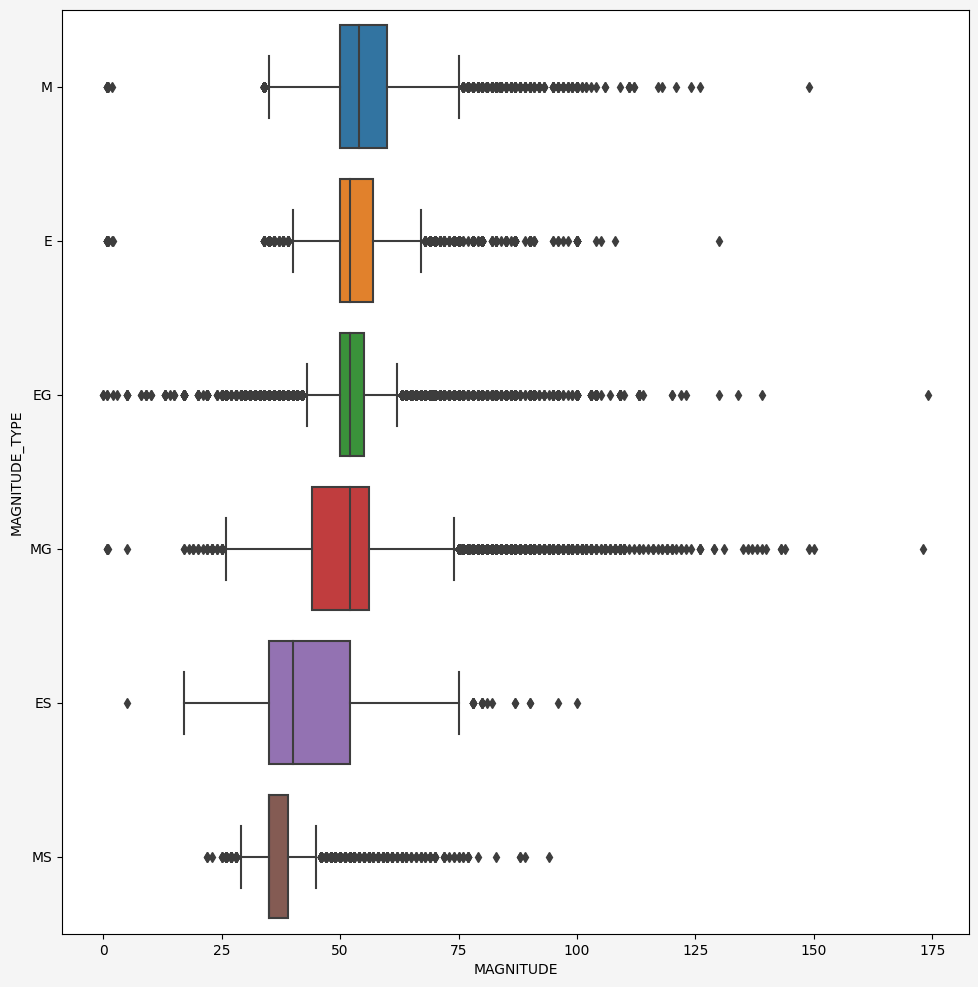

In [17]:
import seaborn as sns
g = sns.boxplot(data=df, x='MAGNITUDE',y='MAGNITUDE_TYPE')
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(11.7, 12)

In [18]:
def damage_to_numeric_check(row,col):
    # Need to check for more signififiers - may be numeric suffixes
    val_dict = {'h':100,'H':100, 'k':1000,'K':1000,'M':1000000,'B':1000000000, 'T': 1000000000000, '?':1}
    if row[col] == 'nan' or row[col] == '':
        return 'NaN'
    else:
        return row[col][-1]
    
df['DAMAGE_PROPERTY_MAGNITUDE'] = df['DAMAGE_PROPERTY'].astype(str)
df['DAMAGE_CROPS_MAGNITUDE'] = df['DAMAGE_CROPS'].astype(str)

col = 'DAMAGE_PROPERTY_MAGNITUDE'
df['DAMAGE_PROPERTY_MAGNITUDE'] = df.apply(lambda x: damage_to_numeric_check(x,col),axis=1)
col = 'DAMAGE_CROPS_MAGNITUDE'
df['DAMAGE_CROPS_MAGNITUDE'] = df.apply(lambda x: damage_to_numeric_check(x,col),axis=1)

In [19]:
print(df['DAMAGE_PROPERTY_MAGNITUDE'].value_counts().to_markdown())
print(df['DAMAGE_CROPS_MAGNITUDE'].value_counts().to_markdown())
print(df['DAMAGE_CROPS'].value_counts().to_markdown())
df['DAMAGE_CROPS'] = df['DAMAGE_CROPS'].astype(str)
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].astype(str)

| DAMAGE_PROPERTY_MAGNITUDE   |            count |
|:----------------------------|-----------------:|
| K                           |      1.03923e+06 |
| NaN                         | 572724           |
| 0                           | 200225           |
| M                           |  20564           |
| B                           |    113           |
| 1                           |     27           |
| 5                           |     25           |
| 2                           |     16           |
| 3                           |     13           |
| 6                           |      9           |
| 4                           |      6           |
| H                           |      5           |
| 7                           |      4           |
| 9                           |      3           |
| 8                           |      2           |
| h                           |      1           |
| DAMAGE_CROPS_MAGNITUDE   |   count |
|:-------------------------|--------:|
| K 

In [20]:
def damage_to_numeric(row,col):
    # Need to check for more signififiers - may be numeric suffixes
    val_dict = {'h':100,'H':100, 'k':1000,'K':1000,'M':1000000,'B':1000000000, 'T': 1000000000000, '?':1}
    if row[col] == 'nan' or row[col] == '' or row[col] == 'NaN':
        return np.nan
    elif row[col][-1] in val_dict:
        if row[col][0:-1] == '':
            return np.nan
        else:
            return float(row[col][0:-1])*val_dict[row[col][-1]]
    else:
        return float(row[col])
    
    
col = 'DAMAGE_PROPERTY'
df['DAMAGE_PROPERTY_NUMERIC'] = df.apply(lambda x: damage_to_numeric(x,col),axis=1)

In [21]:
col = 'DAMAGE_CROPS'
df['DAMAGE_CROPS_NUMERIC'] = df.apply(lambda x: damage_to_numeric(x,col),axis=1).astype('float64')

In [22]:
#print(df['DAMAGE_CROPS_NUMERIC'].value_counts().to_markdown())
df['DAMAGE_CROPS_NUMERIC'] = df['DAMAGE_CROPS_NUMERIC'].astype('float64')
df['DAMAGE_CROPS_NUMERIC'].sort_values().tail(30)
df['DAMAGE_PROPERTY_NUMERIC'] = df['DAMAGE_PROPERTY_NUMERIC'].astype('float64')
df['DAMAGE_PROPERTY_NUMERIC'].sort_values().tail(30)
df['DAMAGE_TOTAL'] = df['DAMAGE_CROPS_NUMERIC'] + df['DAMAGE_CROPS_NUMERIC']

## Need to remove zero values from all computations ##
df['DAMAGE_CROPS_NUMERIC'].replace(0,np.nan)
df['DAMAGE_CROPS_NUMERIC'].replace(0,np.nan)
df['DAMAGE_CROPS_NUMERIC'].replace(0,np.nan)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1940   NaN
1941   NaN
1942   NaN
1943   NaN
1944   NaN
Name: DAMAGE_CROPS_NUMERIC, Length: 1832969, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

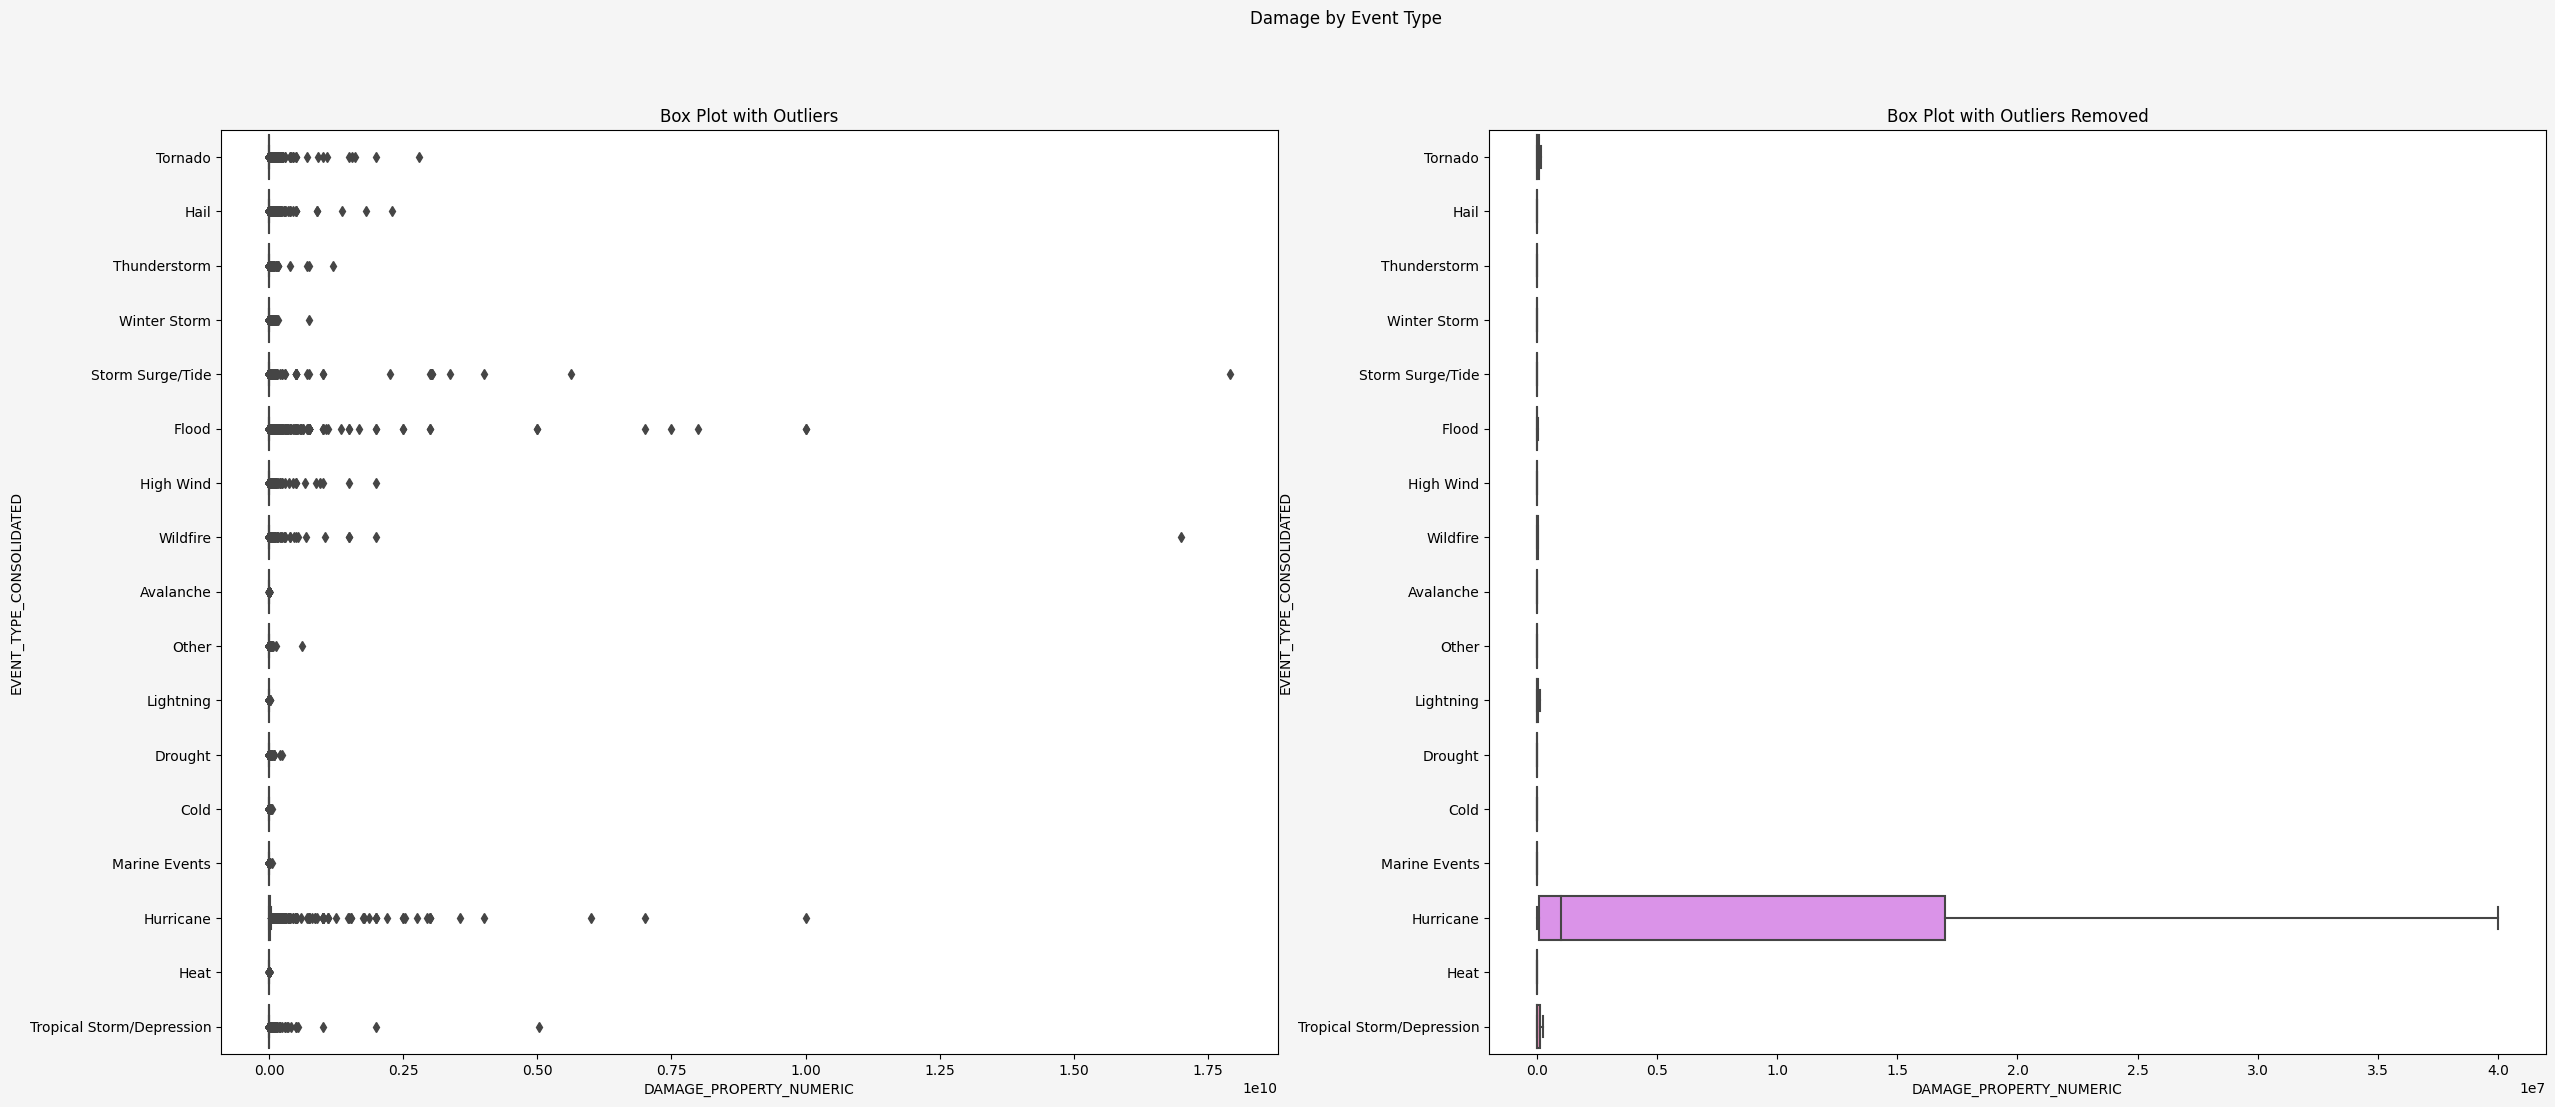

In [23]:
# print(df[df['EVENT_TYPE']=='TORNADOES, TSTM WIND, HAIL']['DAMAGE_PROPERTY_NUMERIC'])
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Damage by Event Type')
g = sns.boxplot(data=df, x='DAMAGE_PROPERTY_NUMERIC',y='EVENT_TYPE_CONSOLIDATED',ax=axs[0])
g.set(title='Box Plot with Outliers')
# g.figure.set_facecolor("whitesmoke")
# g.figure.set_size_inches(11.7, 12)

f = sns.boxplot(data=df, x='DAMAGE_PROPERTY_NUMERIC',y='EVENT_TYPE_CONSOLIDATED',showfliers=False,ax=axs[1])
f.set(title='Box Plot with Outliers Removed')
fig.set_facecolor("whitesmoke")
fig.set_size_inches(30, 12)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

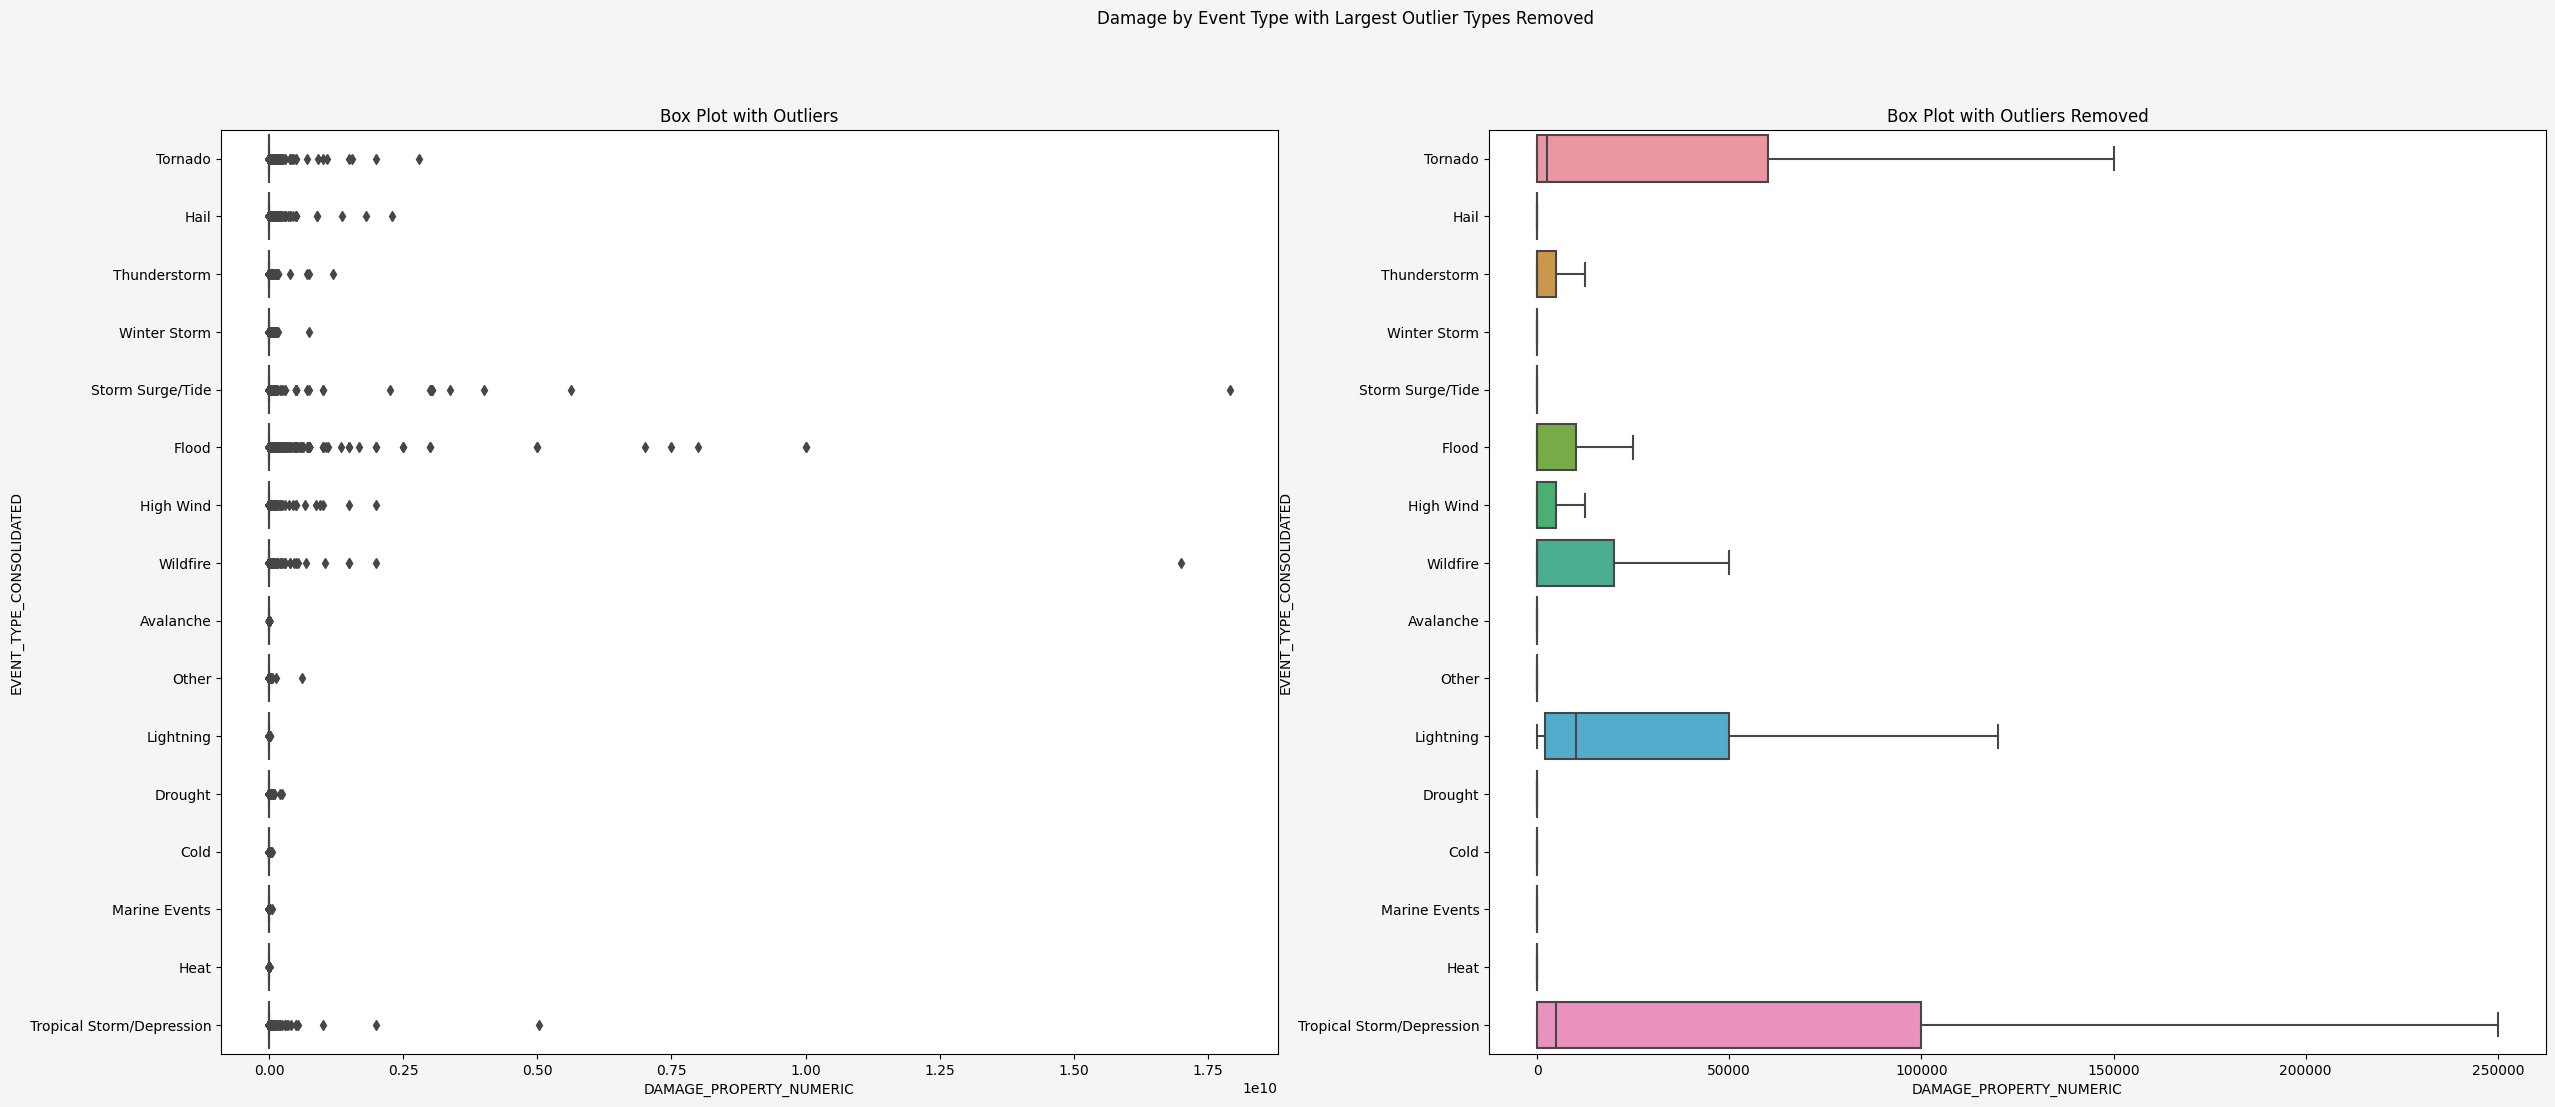

In [24]:
# ## Removing major outlier for plot
df_prop_damage_plot = df[['EVENT_TYPE','EVENT_TYPE_CONSOLIDATED','DAMAGE_PROPERTY_NUMERIC']].copy()
df_prop_damage_plot = df_prop_damage_plot[df_prop_damage_plot['EVENT_TYPE']!='TORNADOES, TSTM WIND, HAIL']
df_prop_damage_plot = df_prop_damage_plot[df_prop_damage_plot['EVENT_TYPE']!='Hurricane']
df_prop_damage_plot = df_prop_damage_plot[df_prop_damage_plot['EVENT_TYPE']!='Hurricane (Typhoon)']
df_prop_damage_plot = df_prop_damage_plot[df_prop_damage_plot['EVENT_TYPE']!='Tsunami']

fig, axs = plt.subplots(ncols=2)
fig.suptitle('Damage by Event Type with Largest Outlier Types Removed')
g = sns.boxplot(data=df_prop_damage_plot, x='DAMAGE_PROPERTY_NUMERIC',y='EVENT_TYPE_CONSOLIDATED',ax=axs[0])
g.set(title='Box Plot with Outliers')
# g.figure.set_facecolor("whitesmoke")
# g.figure.set_size_inches(11.7, 12)

f = sns.boxplot(data=df_prop_damage_plot, x='DAMAGE_PROPERTY_NUMERIC',y='EVENT_TYPE_CONSOLIDATED',showfliers=False,ax=axs[1])
f.set(title='Box Plot with Outliers Removed')
fig.set_facecolor("whitesmoke")
fig.set_size_inches(30, 12)


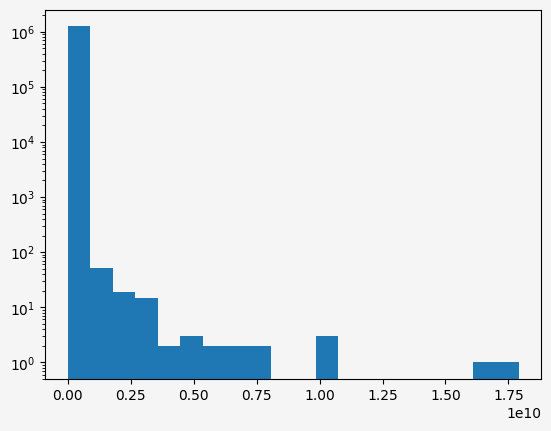

In [25]:
fig, ax = plt.subplots()
hist, bins, _ = plt.hist(x=df['DAMAGE_PROPERTY_NUMERIC'],bins=20,log=True)
#plt.subplot(211)
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')


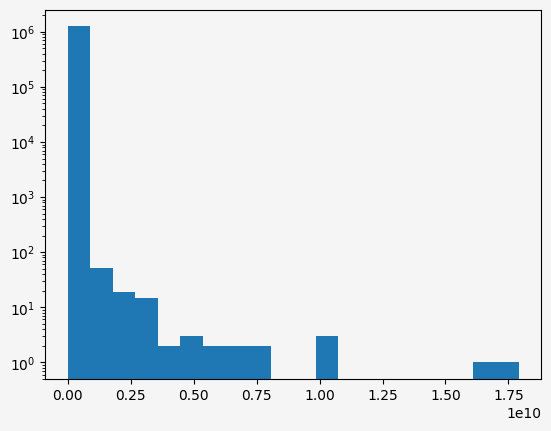

In [26]:
fig, ax = plt.subplots()
hist, bins, _ = plt.hist(x=df['DAMAGE_PROPERTY_NUMERIC'],bins=20,log=True)
#plt.subplot(211)
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

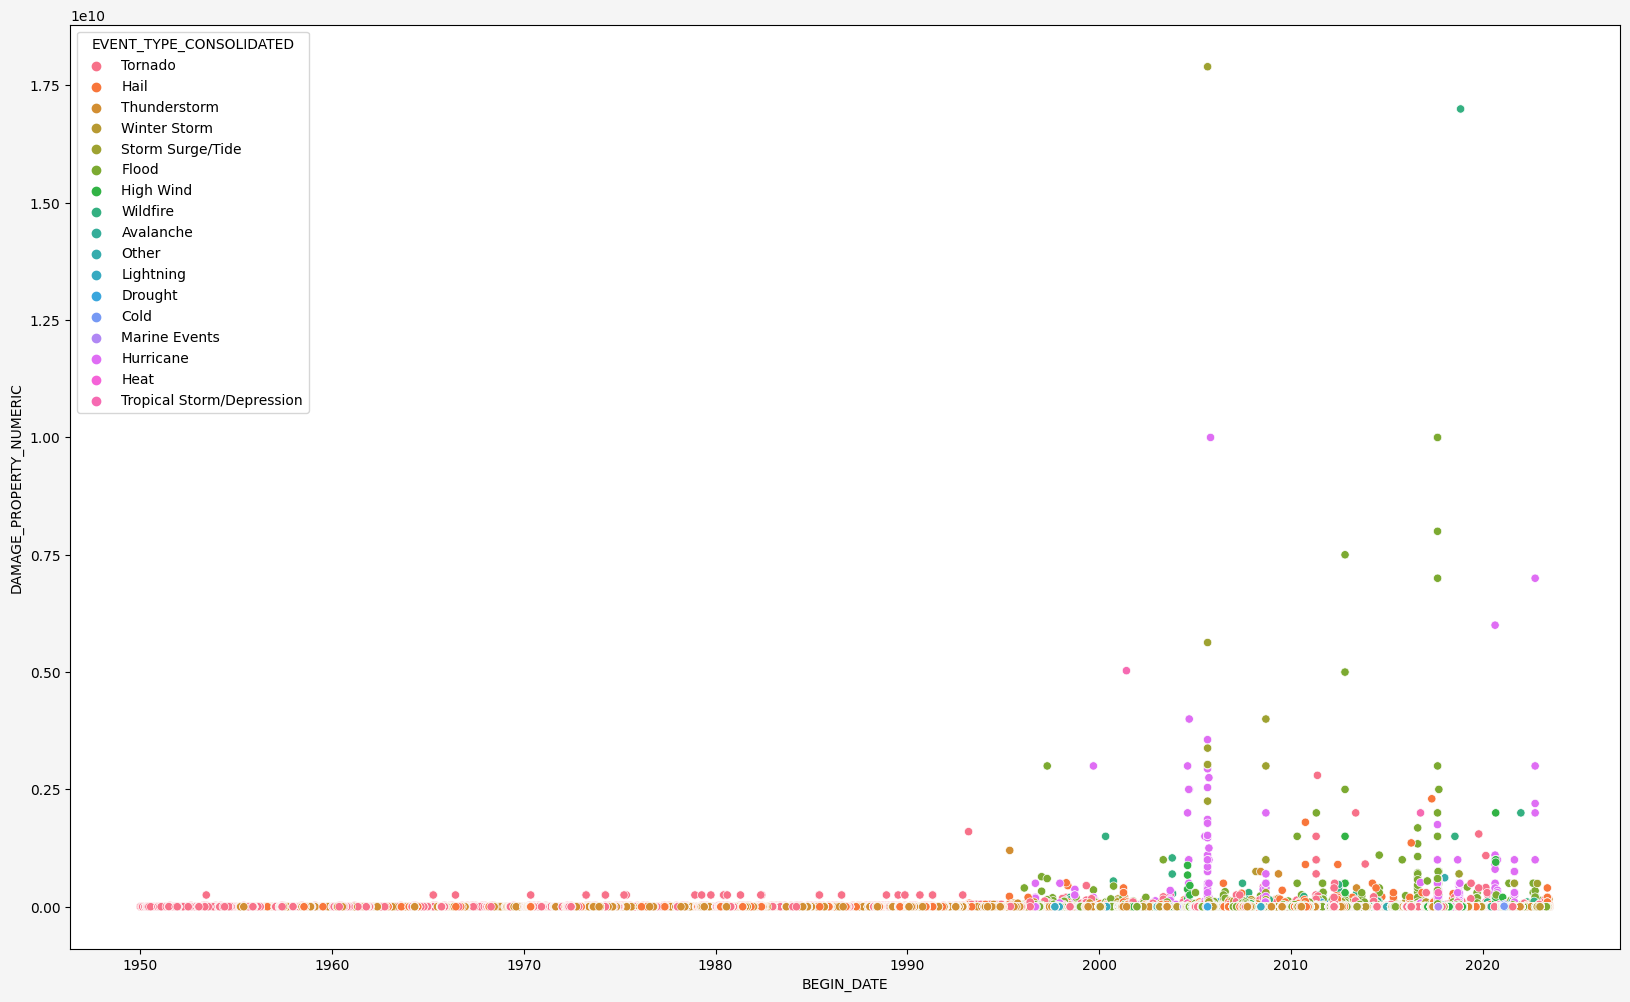

In [27]:
#g = sns.relplot(data=df,x='BEGIN_DATE',y='DAMAGE_PROPERTY_NUMERIC',hue='EVENT_TYPE',height=10,aspect=1,col_wrap=5)
g = sns.scatterplot(data=df,x='BEGIN_DATE',y='DAMAGE_PROPERTY_NUMERIC',hue='EVENT_TYPE_CONSOLIDATED')
g.figure.set_facecolor("whitesmoke")
g.figure.set_size_inches(20, 12)

In [28]:
# g = sns.histplot(data=df,x='BEGIN_YEAR',y='DAMAGE_PROPERTY_NUMERIC')
# g.figure.set_facecolor("whitesmoke")
# g.figure.set_size_inches(20, 12)

In [29]:
#quantiles = df.groupby('BEGIN_YEAR')['DAMAGE_PROPERTY_NUMERIC'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]).unstack()
def quantile_25(col:pd.Series):
    return col.quantile(0.25, numeric_only=True)

def quantile_75(col:pd.Series):
    return col.quantile(0.75, numeric_only=True)

def quantile_90(col:pd.Series):
    return col.quantile(0.90, numeric_only=True)

def quantile_95(col:pd.Series):
    return col.quantile(0.95, numeric_only=True)

def quantile_999(col:pd.Series):
    return col.quantile(0.999, numeric_only=True)

quantiles = df[['BEGIN_YEAR','DAMAGE_PROPERTY_NUMERIC','EVENT_TYPE_CONSOLIDATED']].copy()
quantiles_pivot = quantiles.pivot_table(index='BEGIN_YEAR', values='DAMAGE_PROPERTY_NUMERIC',aggfunc=[quantile_25,np.median,quantile_75])
quantiles_pivot_outliers = quantiles.pivot_table(index='BEGIN_YEAR', values='DAMAGE_PROPERTY_NUMERIC',aggfunc=[quantile_90,quantile_95,quantile_999])

quantiles_tornado = quantiles.loc[quantiles['EVENT_TYPE_CONSOLIDATED']=='Tornado']
quantiles_pivot_tornados =  quantiles_tornado.pivot_table(index='BEGIN_YEAR', values='DAMAGE_PROPERTY_NUMERIC',aggfunc=[quantile_25,np.median,quantile_75])
quantiles_pivot_tornados_outliers = quantiles_tornado.pivot_table(index='BEGIN_YEAR', values='DAMAGE_PROPERTY_NUMERIC',aggfunc=[quantile_90,quantile_95,quantile_999])


event_totals =  quantiles.pivot_table(index='BEGIN_YEAR', values='DAMAGE_PROPERTY_NUMERIC', columns='EVENT_TYPE_CONSOLIDATED',aggfunc='count')
#event_totals = event_totals.fillna(0)

damage_totals =  quantiles.pivot_table(index='BEGIN_YEAR', values='DAMAGE_PROPERTY_NUMERIC', columns='EVENT_TYPE_CONSOLIDATED',aggfunc='sum')
#damage_totals = damage_totals.fillna(0)
print(damage_totals.head())


TypeError: Series.quantile() got an unexpected keyword argument 'numeric_only'

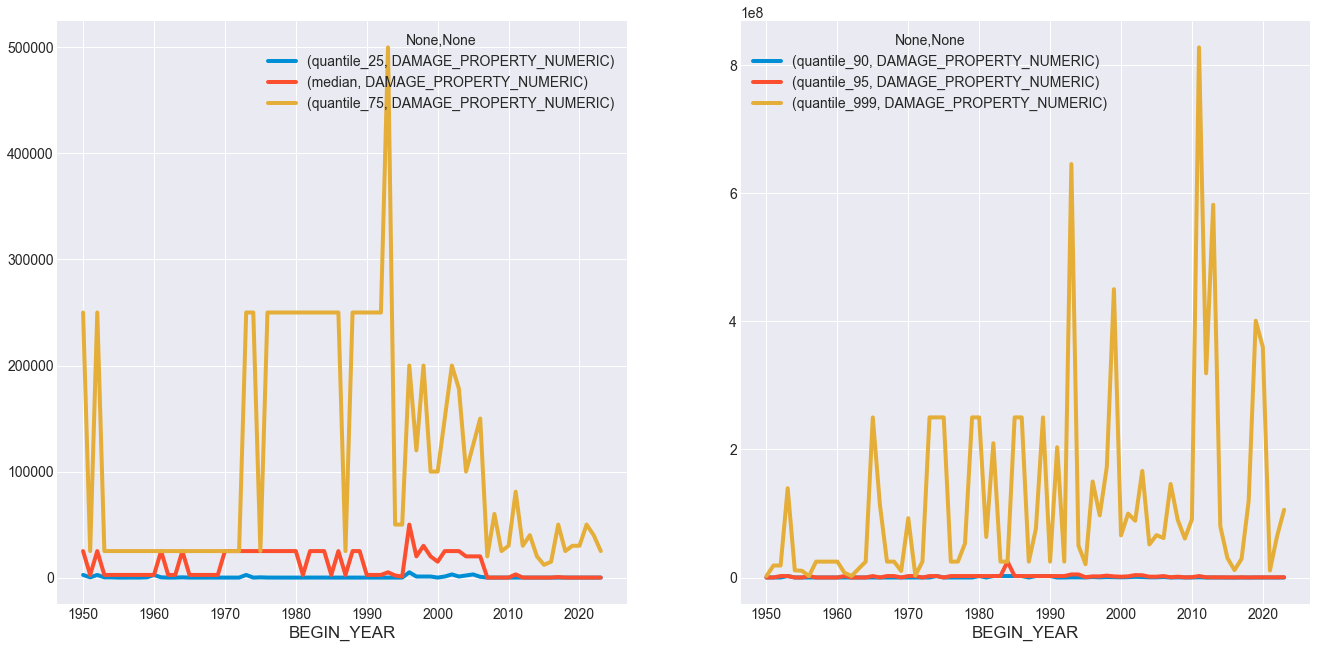

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.style.use('seaborn-darkgrid')
fig, (ax1,ax2) = plt.subplots(1,2)
quantiles_pivot_tornados.plot(ax=ax1)
quantiles_pivot_tornados_outliers.plot(ax=ax2)
plt.show()

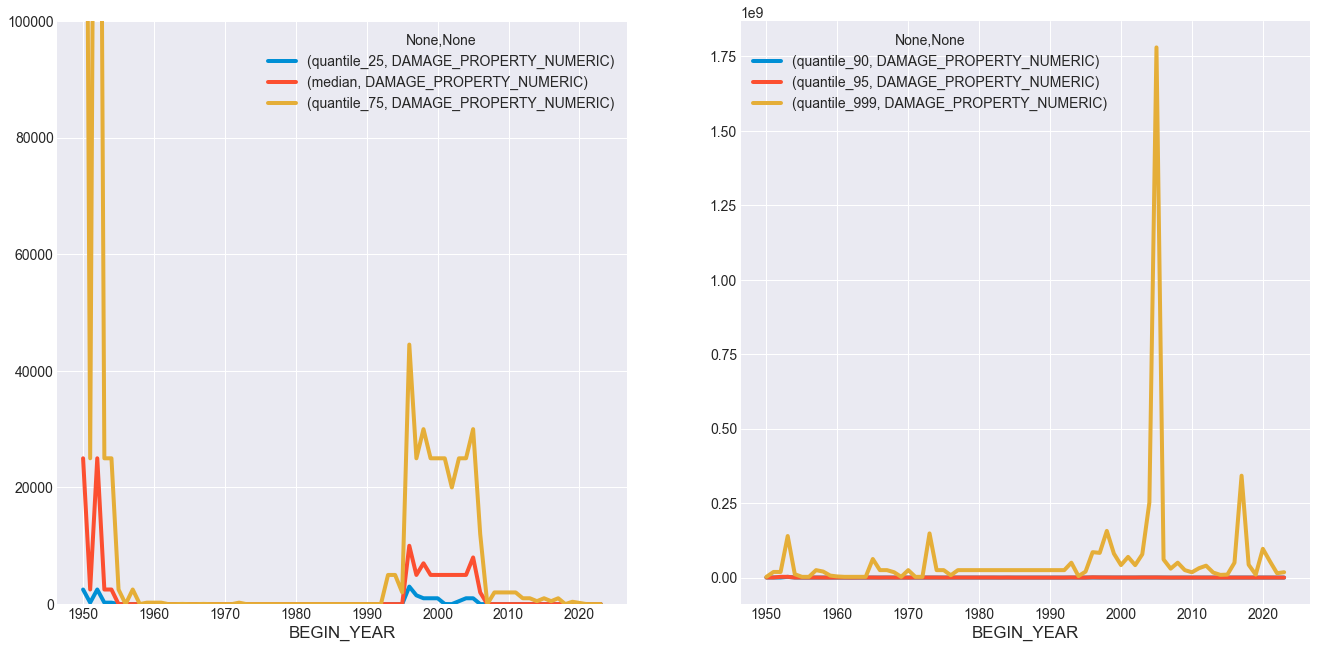

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.style.use('seaborn-darkgrid')
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.set_ylim([0,100000])
quantiles_pivot.plot(ax=ax1)
quantiles_pivot_outliers.plot(ax=ax2)
plt.show()

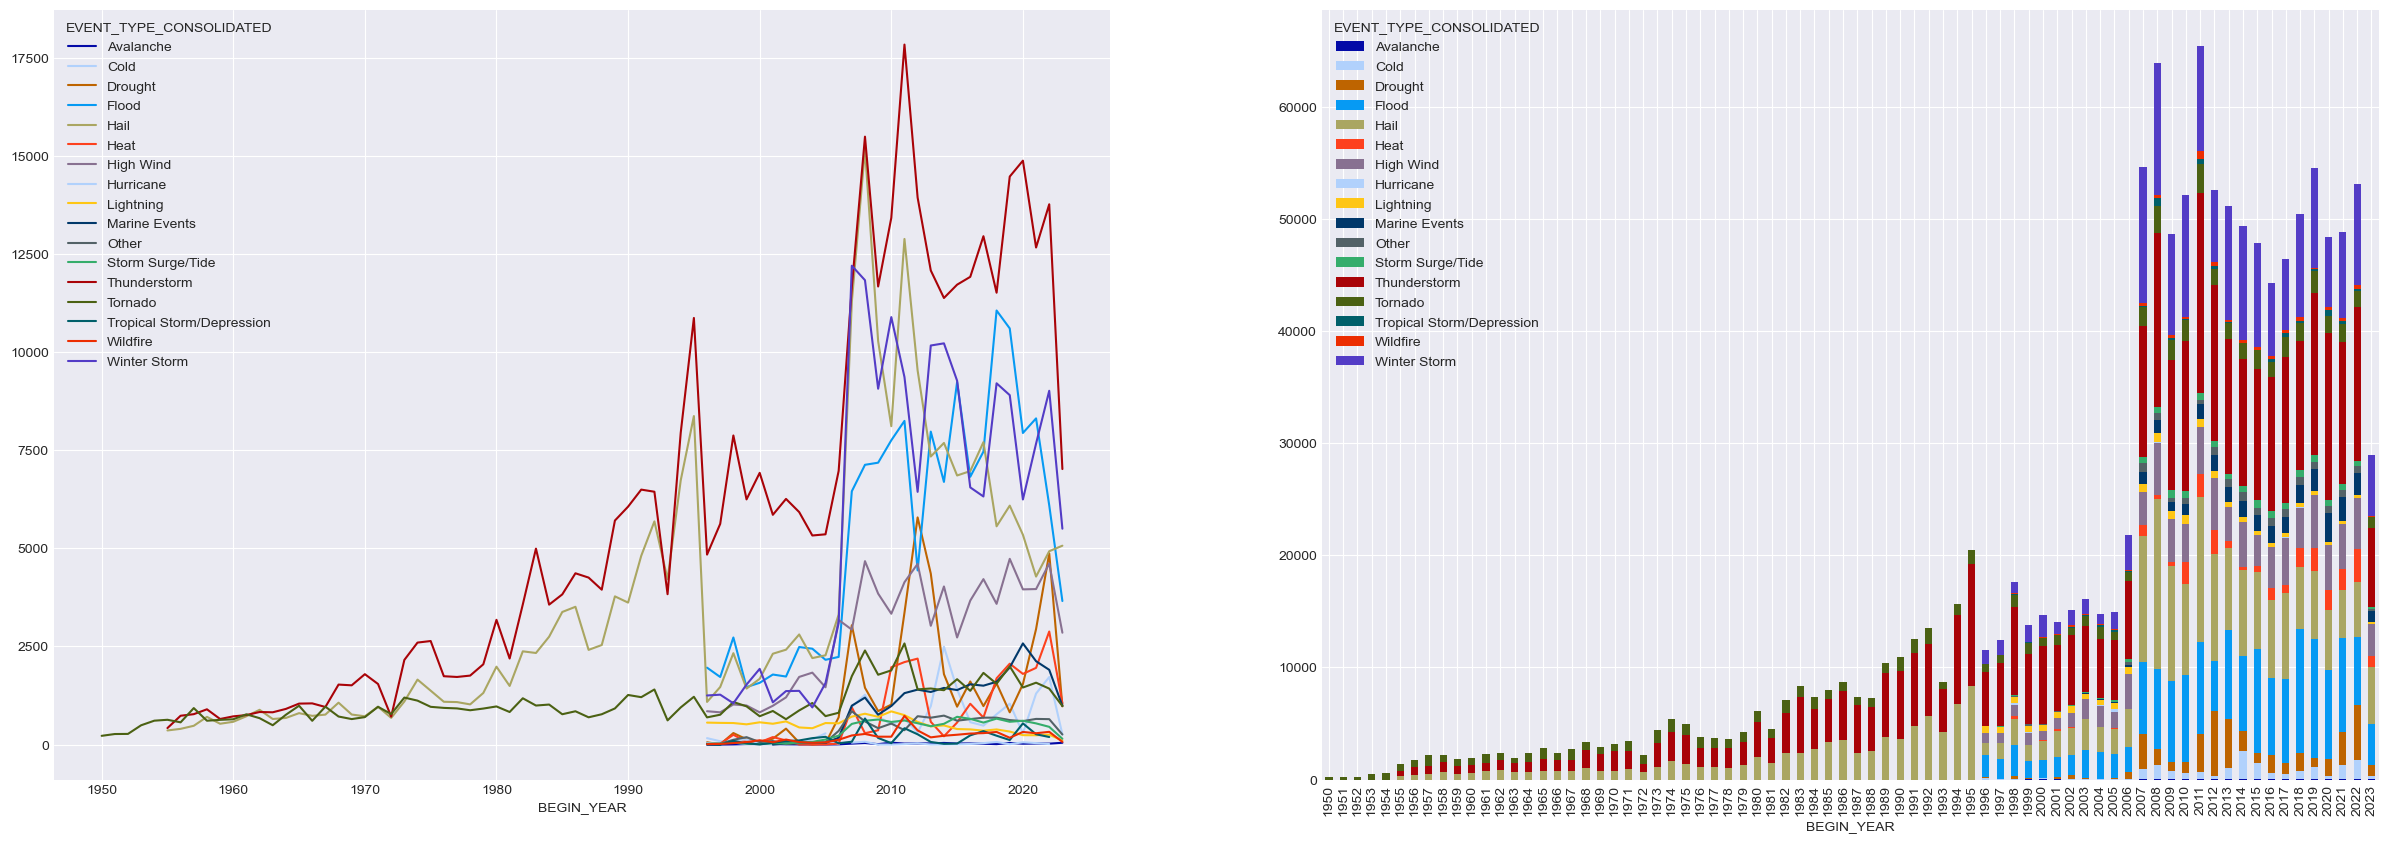

In [ ]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.style.use('seaborn-darkgrid')
fig, (ax1,ax2) = plt.subplots(1,2)
colors = ['xkcd:cobalt blue','xkcd:powder blue','xkcd:orange brown','xkcd:azure','xkcd:khaki','xkcd:orange red','xkcd:greyish purple', 'xkcd:powder blue','xkcd:golden yellow','xkcd:marine blue','xkcd:gunmetal','xkcd:seaweed green','xkcd:darkish red','xkcd:camouflage green','xkcd:petrol','xkcd:tomato red','xkcd:blue with a hint of purple']
event_totals.plot(ax=ax1,color=colors)
event_totals.plot(kind='bar',stacked=True,ax=ax2,color=colors)

plt.show()

In [ ]:
df['DAMAGE_PROPERTY_QUANTILE'] = pd.qcut(df['DAMAGE_PROPERTY_NUMERIC'].rank(method='first'), q=[0,0.5,0.75,0.9,0.95,0.99,1],labels=['0.0-0.5','0.5-0.75','0.75-0.9','0.9-0.95','0.95-0.99','0.99-1.0'])

In [ ]:
quantile_totals =  df.pivot_table(index='BEGIN_YEAR', values='DAMAGE_PROPERTY_NUMERIC', columns='DAMAGE_PROPERTY_QUANTILE',aggfunc='sum')
quantile_percents = quantile_totals.div(quantile_totals.sum(axis=1),axis=0) ## sum over rows, divide over column
quantile_percents.head()

DAMAGE_PROPERTY_QUANTILE,0.0-0.5,0.5-0.75,0.75-0.9,0.9-0.95,0.95-0.99,0.99-1.0
BEGIN_YEAR,,,,,,
1950,0.0,0.000048,0.057422,0.0,0.435014,0.507516
1951,0.0,0.000091,0.030532,0.0,0.129759,0.839618
1952,0.0,0.000024,0.024920,0.0,0.153231,0.821826
1953,0.0,0.000016,0.006031,0.0,0.025163,0.968790
1954,0.0,0.000120,0.058796,0.0,0.212691,0.728393


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


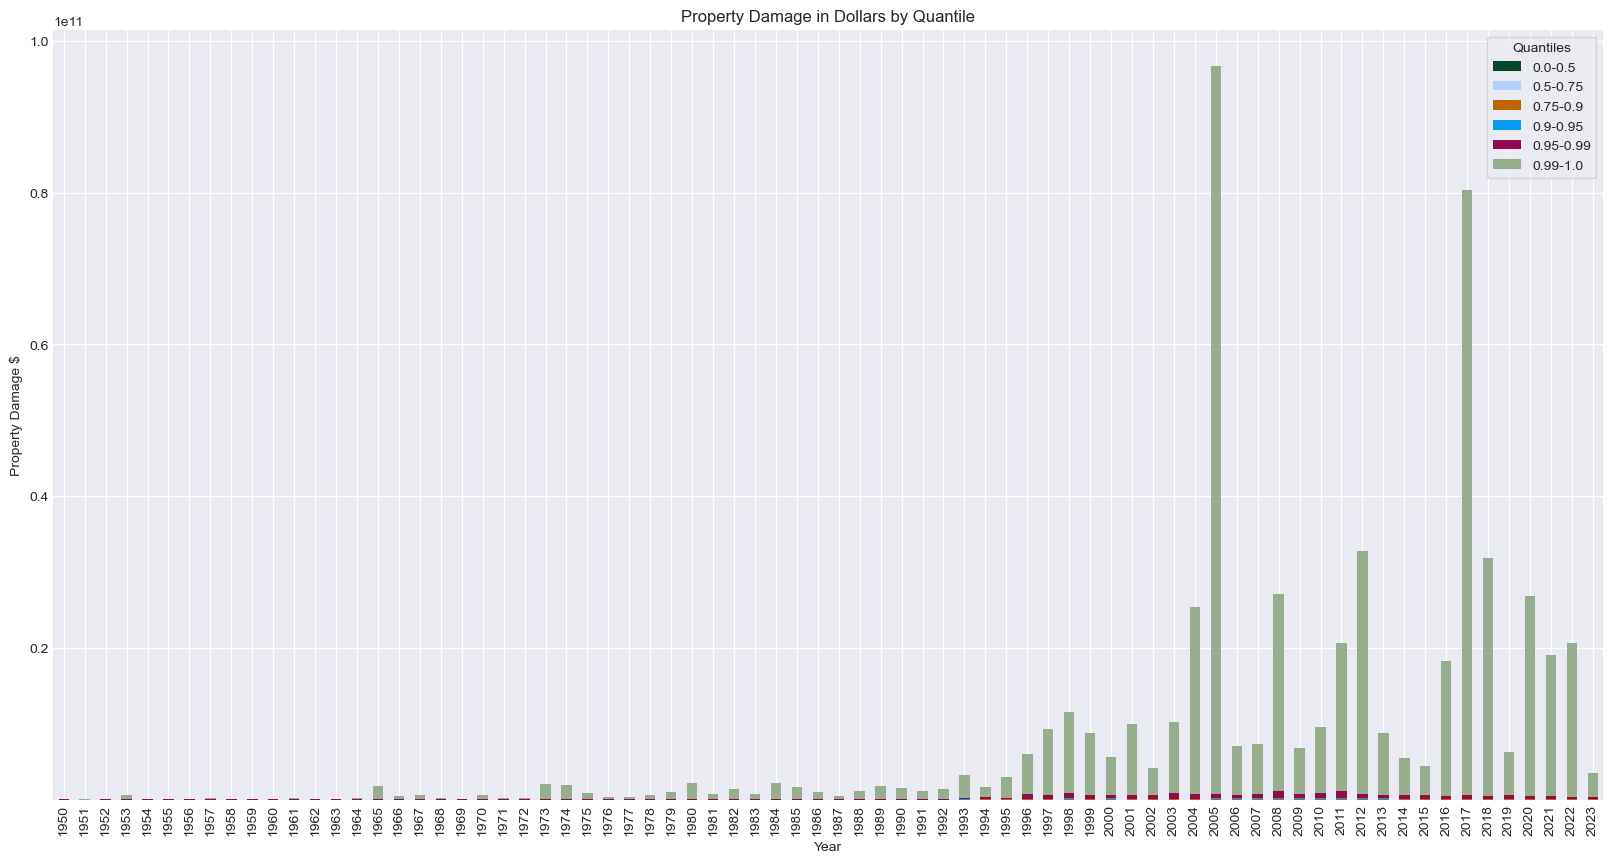

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.style.use('seaborn-darkgrid')
quant_colors = ['xkcd:evergreen','xkcd:powder blue','xkcd:orange brown','xkcd:azure','xkcd:reddish purple','xkcd:greenish grey']
ax = quantile_totals.plot(kind='bar',stacked=True,ylabel='Property Damage $', xlabel='Year', title='Property Damage in Dollars by Quantile',color=quant_colors)
ax.legend(frameon=True, title='Quantiles')
plt.show()

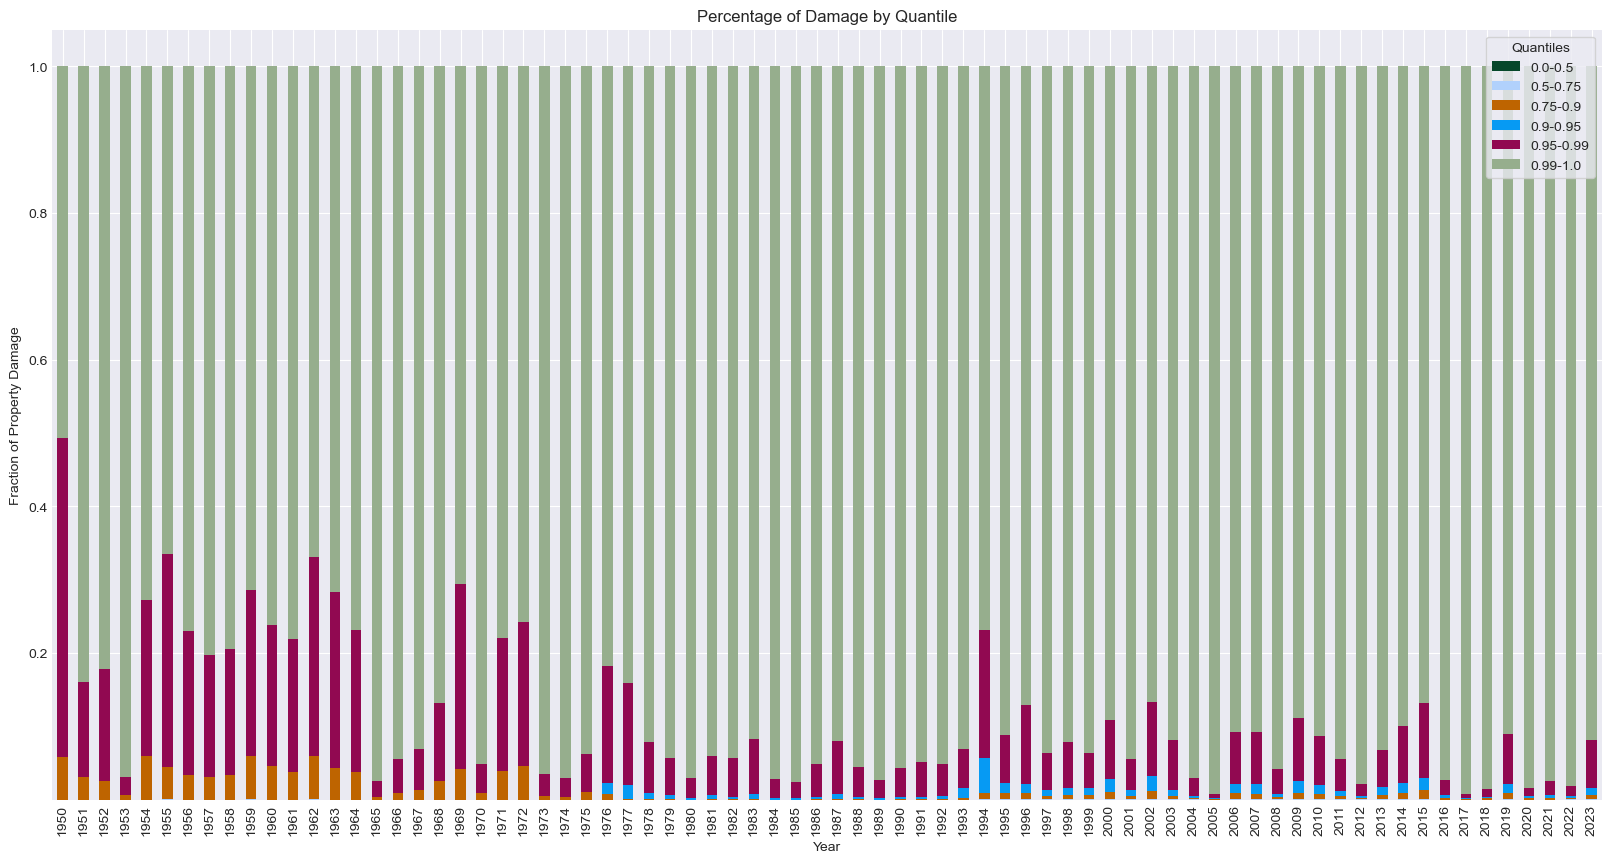

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [20, 10]
plt.style.use('seaborn-darkgrid')

ax = quantile_percents.plot(kind='bar',stacked=True,ylabel='Fraction of Property Damage', xlabel='Year', title='Percentage of Damage by Quantile',color=quant_colors)
ax.legend(frameon=True, title='Quantiles')
plt.show()

In [45]:
#Regression on tornado injuries over the years
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']
tornado_yearly = tornado_df.groupby('END_YEAR')['INJURIES_DIRECT'].sum().reset_index()

# Perform linear regression
X = sm.add_constant(tornado_yearly['END_YEAR'])  # Adding a constant term for the intercept
model = sm.OLS(tornado_yearly['INJURIES_DIRECT'], X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        INJURIES_DIRECT   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     5.294
Date:                Sat, 09 Dec 2023   Prob (F-statistic):             0.0243
Time:                        12:21:24   Log-Likelihood:                -627.27
No. Observations:                  74   AIC:                             1259.
Df Residuals:                      72   BIC:                             1263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.062e+04   1.27e+04      2.405      0.0

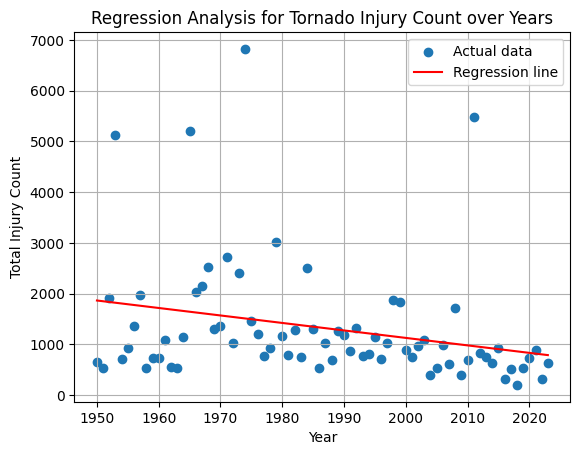

In [46]:
# Plotting the actual data points
plt.scatter(tornado_yearly['END_YEAR'], tornado_yearly['INJURIES_DIRECT'], label='Actual data')

# Plotting the regression line
plt.plot(tornado_yearly['END_YEAR'], model.predict(X), color='red', label='Regression line')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Injury Count')
plt.title('Regression Analysis for Tornado Injury Count over Years')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
#Regression on tornado injuries over the years
hurricane_df = df[df['EVENT_TYPE'] == 'Hurricane']
hurricane_yearly = hurricane_df.groupby('END_YEAR')['INJURIES_DIRECT'].sum().reset_index()

# Perform linear regression
X = sm.add_constant(hurricane_yearly['END_YEAR'])  # Adding a constant term for the intercept
model = sm.OLS(hurricane_yearly['INJURIES_DIRECT'], X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        INJURIES_DIRECT   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.5180
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.504
Time:                        16:41:03   Log-Likelihood:                -40.578
No. Observations:                   7   AIC:                             85.16
Df Residuals:                       5   BIC:                             85.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.593e+04    3.6e+04      0.721      0.5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


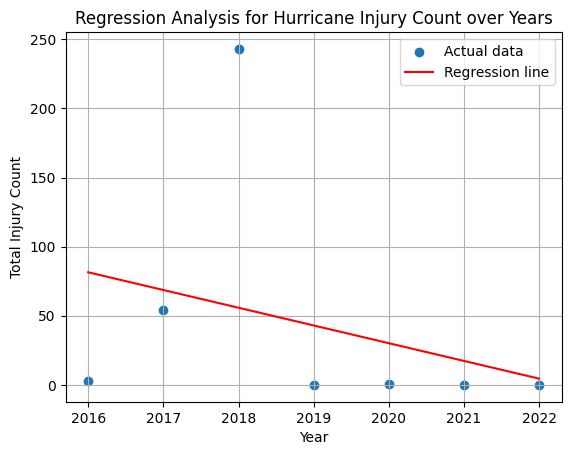

In [48]:
# Plotting the actual data points
plt.scatter(hurricane_yearly['END_YEAR'], hurricane_yearly['INJURIES_DIRECT'], label='Actual data')

# Plotting the regression line
plt.plot(hurricane_yearly['END_YEAR'], model.predict(X), color='red', label='Regression line')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Injury Count')
plt.title('Regression Analysis for Hurricane Injury Count over Years')
plt.legend()
plt.grid(True)
plt.show()